### Corona Virus Death Rate Region Comparison

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [17]:
for dirname, what_is_this, filenames in os.walk('/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206'):
    for filename in filenames:
        print(os.path.join(dirname,filename))


/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206/who_covid_19_sit_rep_time_series.csv
/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206/.DS_Store
/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206/DXY_Coronavirus_Area.csv
/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206/2019-nCoV-cases-JHU.csv
/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206/Pandemic (H1N1) 200905-200907.csv


In [18]:
data = pd.read_csv('/Users/nyvara/Desktop/MyFiles/ML_FILES/CoronavirusPrediction/coronavirus-dataset-update-0206/2019-nCoV-cases-JHU.csv')

In [20]:
data.head()

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,3/3/2020 12:00,Hubei,Mainland China,2020-03-03T11:43:02,67217,2835,36208,30.9756,112.2707
1,3/3/2020 12:00,NaN,South Korea,2020-03-03T09:43:02,5186,28,30,36.0000,128.0000
2,3/3/2020 12:00,NaN,Italy,2020-03-03T20:03:06,2502,79,160,43.0000,12.0000
3,3/3/2020 12:00,NaN,Iran,2020-03-03T14:23:03,2336,77,291,32.0000,53.0000
4,3/3/2020 12:00,Guangdong,Mainland China,2020-03-03T10:23:10,1350,7,1101,23.3417,113.4244


In [24]:
data['Date'] = pd.to_datetime(data['Date'])

In [25]:
data.head()

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long,Data
0,2020-03-03 12:00:00,Hubei,Mainland China,2020-03-03T11:43:02,67217,2835,36208,30.9756,112.2707,2020-03-03 12:00:00
1,2020-03-03 12:00:00,NaN,South Korea,2020-03-03T09:43:02,5186,28,30,36.0000,128.0000,2020-03-03 12:00:00
2,2020-03-03 12:00:00,NaN,Italy,2020-03-03T20:03:06,2502,79,160,43.0000,12.0000,2020-03-03 12:00:00
3,2020-03-03 12:00:00,NaN,Iran,2020-03-03T14:23:03,2336,77,291,32.0000,53.0000,2020-03-03 12:00:00
4,2020-03-03 12:00:00,Guangdong,Mainland China,2020-03-03T10:23:10,1350,7,1101,23.3417,113.4244,2020-03-03 12:00:00


In [26]:
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [27]:
data.head()

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long,Data
0,2020-03-03 12:00:00,Hubei,Mainland China,2020-03-03 11:43:02,67217,2835,36208,30.9756,112.2707,2020-03-03 12:00:00
1,2020-03-03 12:00:00,NaN,South Korea,2020-03-03 09:43:02,5186,28,30,36.0000,128.0000,2020-03-03 12:00:00
2,2020-03-03 12:00:00,NaN,Italy,2020-03-03 20:03:06,2502,79,160,43.0000,12.0000,2020-03-03 12:00:00
3,2020-03-03 12:00:00,NaN,Iran,2020-03-03 14:23:03,2336,77,291,32.0000,53.0000,2020-03-03 12:00:00
4,2020-03-03 12:00:00,Guangdong,Mainland China,2020-03-03 10:23:10,1350,7,1101,23.3417,113.4244,2020-03-03 12:00:00


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4709 non-null   datetime64[ns]
 1   Province     3277 non-null   object        
 2   Region       4709 non-null   object        
 3   Last Update  4709 non-null   datetime64[ns]
 4   Confirmed    4709 non-null   int64         
 5   Deaths       4709 non-null   int64         
 6   Recovered    4709 non-null   int64         
 7   Lat          417 non-null    float64       
 8   Long         417 non-null    float64       
 9   Data         4709 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 368.0+ KB


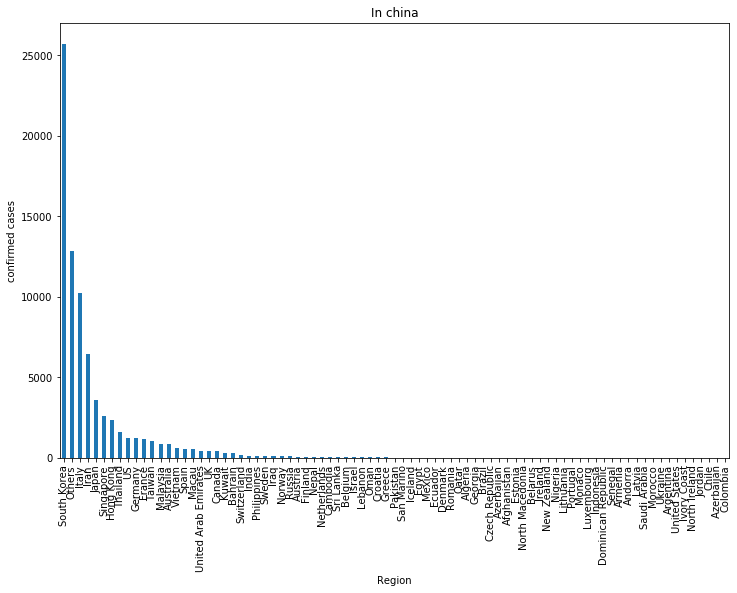

In [53]:
data_region_confirmed = (data[data['Region'] != 'Mainland China']).groupby(['Region']).sum().sort_values(by=['Confirmed'], ascending = False).Confirmed
plt.figure(figsize = (12,8))
plt.title('In china')
plt.xlabel('Region')
plt.ylabel('confirmed cases')
data_region_confirmed.plot(kind = 'bar')

In [54]:
latest_date = data['Date'].max()
latest_date

Timestamp('2020-03-03 12:00:00')

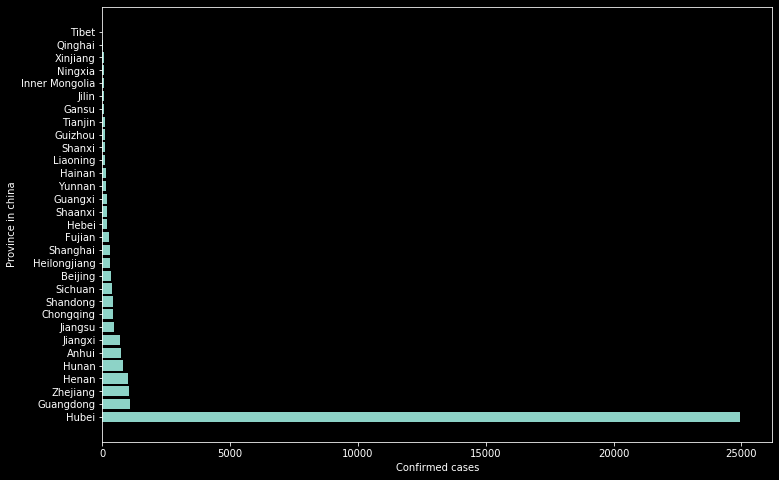

In [68]:
data_latest = data[data['Date'] == '2020-02-08 15:40:00']
data_latest_china = data_latest[data_latest['Region'] == 'Mainland China']
plt.figure(figsize = (12,8))
plt.barh(data_latest_china.Province,data_latest_china.Confirmed)
plt.xlabel('Confirmed cases')
plt.ylabel('Province in china')
plt.show()

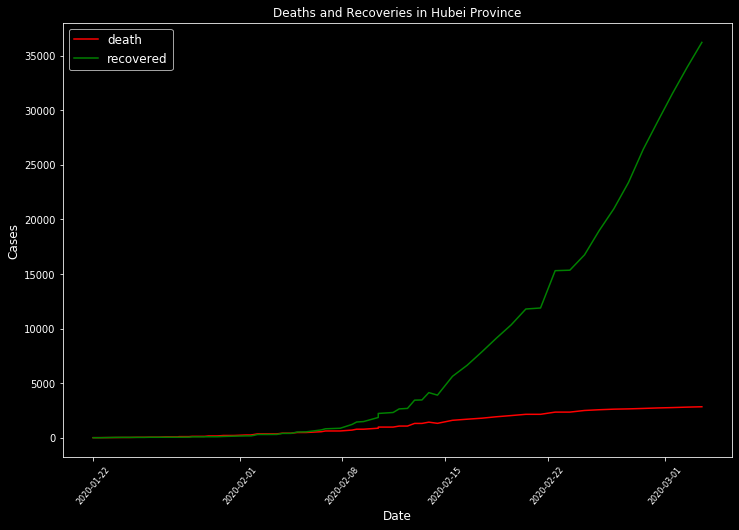

In [69]:
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50, size = 8)
plt.plot(data[data['Province'] == 'Hubei'].Date, data[data['Province'] == 'Hubei'].Deaths, color = 'red')
plt.plot(data[data['Province'] == 'Hubei'].Date, data[data['Province'] == 'Hubei'].Recovered, color='green')
plt.legend(['death','recovered'], fontsize = 12)
plt.title('Deaths and Recoveries in Hubei Province')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
plt.show()

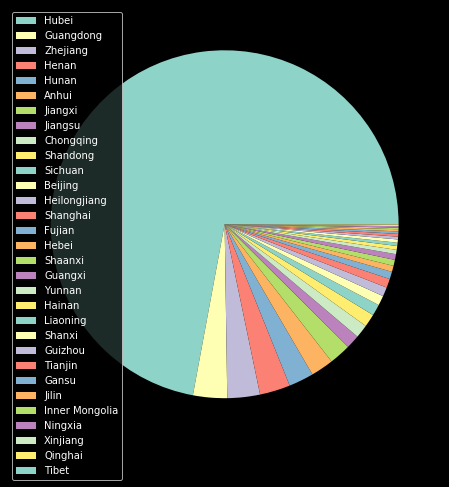

In [70]:
plt.figure(figsize=(12, 8))
plt.pie(data_latest_china.Confirmed)
plt.legend(data_latest_china.Province, loc = 'best')
plt.show()


In [72]:
data_outside_hubei = data[data['Region'] != 'Hubei']
grouped_data_outside_hubei = data_outside_hubei.groupby('Date').sum()
grouped_data_outside_hubei.head()

,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,
2020-01-22 00:00:00,332,6,0,0.0,0.0
2020-01-22 12:00:00,555,9,0,0.0,0.0
2020-01-23 12:00:00,653,18,30,0.0,0.0
2020-01-24 00:00:00,881,26,34,0.0,0.0
2020-01-24 12:00:00,941,26,36,0.0,0.0


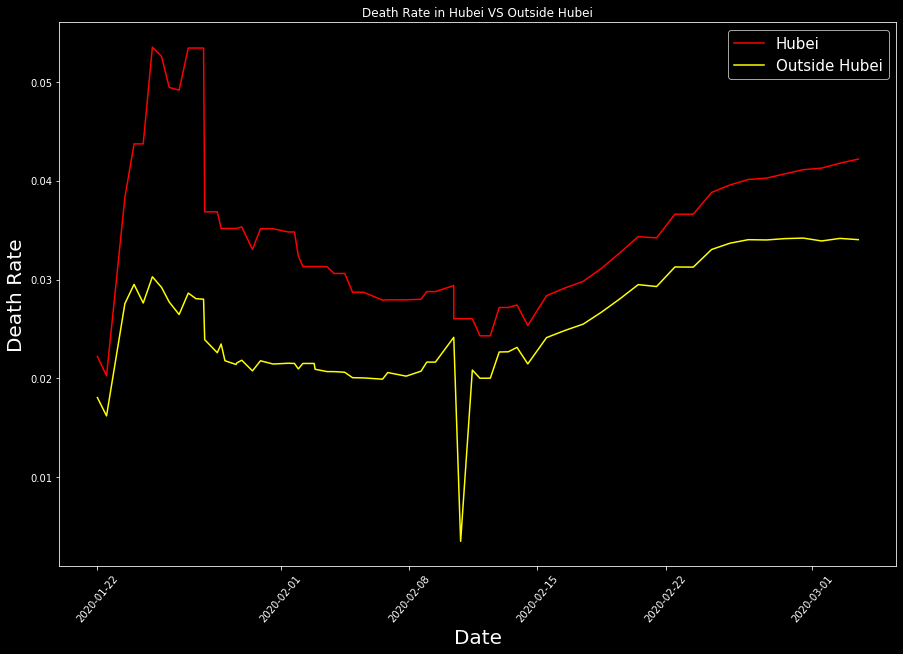

In [73]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=50,size=10)
plt.plot(data[data['Province']=='Hubei'].Date,data[data['Province']=='Hubei'].Deaths/data[data['Province']=='Hubei'].Confirmed,color='red')
plt.plot(grouped_data_outside_hubei['Deaths']/grouped_data_outside_hubei['Confirmed'],color='yellow')
plt.title('Death Rate in Hubei VS Outside Hubei')
plt.xlabel('Date',size=20)
plt.ylabel('Death Rate',size=20)
plt.legend(['Hubei','Outside Hubei'],fontsize=15)
plt.show()

### We can get the conclusion that the death rate inside Hubei is significant higher than than other provinces.

#### There might be three possible reasons:

    -After isolation of several major cities in Hubei province, there is a significant lack of medical resources, and -people suffer from great anxieties which causes the high death rate.
-The toxicity of the virus has reduced after it spreads outside Huber province.
-The number of mild patients in Hubei Province is severely underestimated。